In [1]:
from src.codeGameSimulation.GameUr import GameUr, Player, Dice, GameSettings
import gameBoardDisplay as gbd

from typing import List

import locale

import numpy as np

from helpers import colorboxplot, makeVlines, zeichneErrechnetenWert, makeHistogram, colors
from src.codeGameSimulation.store2db import getDataFromDB, getGameFromDB, getGSFromDB

# %config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import matplotlib.ticker as mt
import matplotlib.patches as mp

locale.setlocale(locale.LC_NUMERIC, "german")

mplstyle.use("fast")
mplstyle.use("default")


In [2]:
db_dir = "D:/Uni/BA/data/"
db_filename_strategies = "gameHistories_strategy_"
db_filename_baseline = "gameHistories_baseline_two_players"
# db_filename_strategies_suffixes = ["move_last", "move_first", "score_SF", "score", "score_DR", "score_TO"]
db_filename_strategies_suffixes = ["move_last", "move_first", "score_MF_nF"]

prefix_graphics = "Strategievergleich: "
graphic_dir = "Strategievergleich"


In [3]:
all_roundCounts=[]
all_winners=[]
all_settingsIDs = []
all_gs=[]
for db_filename in [db_filename_baseline]+[db_filename_strategies+suffix for suffix in db_filename_strategies_suffixes]:
    ids, roundCounts, _, winners, settingsIDs = getDataFromDB(db_dir, db_filename)
    gs_unordered = getGSFromDB(db_dir, db_filename)
    all_roundCounts.append(roundCounts[0])
    all_winners.append(winners[0])
    all_settingsIDs.append(settingsIDs[0])
    all_gs.append(gs_unordered[0])
    print([len(id) for id in ids])


db load finished after 0:00:07.618722
sort finished after 0:00:00.102023
groupby finished after 0:00:00.125028
sort finished after 0:00:00.454102
split finished after 0:00:04.167942
settings loaded
[1500000]
db load finished after 0:00:04.797092
sort finished after 0:00:00.067016
groupby finished after 0:00:00.083009
sort finished after 0:00:00.303060
split finished after 0:00:02.678606
settings loaded
[1000000]
db load finished after 0:00:04.859099
sort finished after 0:00:00.070015
groupby finished after 0:00:00.082028
sort finished after 0:00:00.300067
split finished after 0:00:02.656601
settings loaded
[1000000]
db load finished after 0:00:04.812088
sort finished after 0:00:00.067016
groupby finished after 0:00:00.084018
sort finished after 0:00:00.304069
split finished after 0:00:02.753622
settings loaded
[1000000]


In [4]:
gs_unordered= all_gs
all_labels = [gs_.getPlayers()[1].getStrategy().getFigName() for gs_ in gs_unordered]
all_labels[0]="Baseline"
all_labels


['Baseline', 'MoveLast', 'MoveFirst', 'Score MF nF']

In [5]:
avg_len =[np.mean(rc) for rc in all_roundCounts]


In [6]:
def sort_on_other_list(list_to_sort: List[object], sortabel_list:List[object]):
    if len(set(sortabel_list)) != len(sortabel_list) or len(list_to_sort) != len(sortabel_list):
        print("cant sort because of equal values or not matching dimensions")
        print("len set sortable list: ", len(set(sortabel_list)))
        print("len sortable list: ", len(sortabel_list))
        print("len list_to_sort: ", len(list_to_sort))
        return
    else:
        sorted_list = sortabel_list.copy()
        sorted_list.sort()
        return [list_to_sort[sortabel_list.index(x)] for x in sorted_list]
        

sorted_rc = sort_on_other_list(all_roundCounts, avg_len)
sorted_labels = sort_on_other_list(all_labels, avg_len)
sorted_winners = sort_on_other_list(all_winners, avg_len)
colors = sort_on_other_list(list(colors)[:len(avg_len)], avg_len)
colors

['red', 'green', 'crimson', 'blue']

7


Text(0.5, 0, 'empirisch bestimmte Spiellänge in Runden')

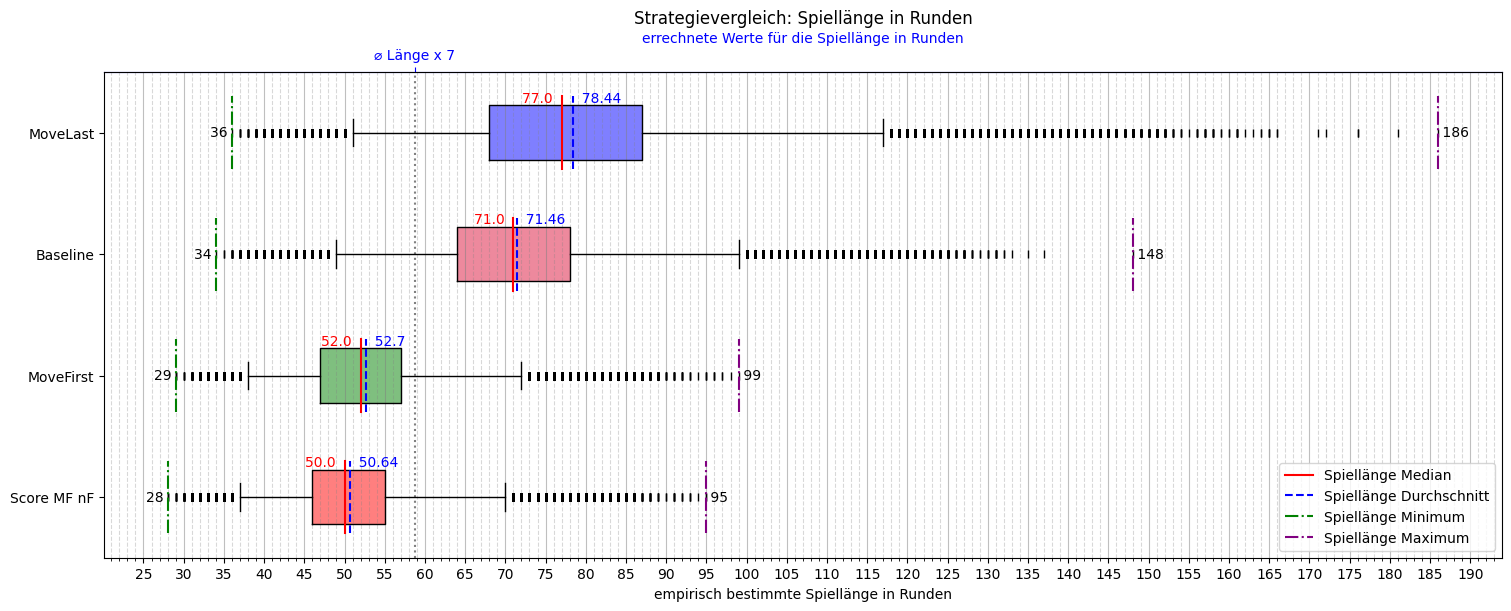

In [7]:
figRounds, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[ 15, 6], layout="constrained")
# ax2 = plt.twinx(ax["Boxplots Runden"])
# makeHistogram(ax2,[rc],[""],colors[0],fill=False)
# ax2.set_ylabel("Wahrschenlichkeit")
zeichneErrechnetenWert(ax["Boxplots Runden"], "r", 7)

colorboxplot(sorted_rc, ax["Boxplots Runden"], sorted_labels, colors, ncol=1)
ax["Boxplots Runden"].set_title(prefix_graphics+"Spiellänge in Runden")
ax["Boxplots Runden"].set_xlabel('empirisch bestimmte Spiellänge in Runden')


In [8]:

roundInfo=[{"Strategie": sorted_labels[i],
    "avg": np.mean(rc),
    "min": np.min(rc),
    "max": np.max(rc),
  "p1": np.percentile(rc, 1),
  "p25": np.percentile(rc, 25),
  "p50": np.percentile(rc, 50),
  "p75": np.percentile(rc, 75),
  "p99": np.percentile(rc, 99),
  "min_count": rc.count(np.min(rc)),
  "max_count": rc.count(np.max(rc)),
  "samplesize": len(rc),
  }for i, rc in enumerate(sorted_rc)]

# roundInfo



In [9]:
tmp = " \\\\\n".join([str("{Strategie} & {avg:3.2f} & {min:3.0f} & {max:3.0f} & {p1:3.0f} & {p25:3.0f} & {p50:3.0f} & {p75:3.0f} & {p99:3.0f} & {samplesize}".format(**ri)) for ri in roundInfo])
print(tmp+"\\\\")


Score MF nF & 50.64 &  28 &  95 &  37 &  46 &  50 &  55 &  70 & 1000000 \\
MoveFirst & 52.70 &  29 &  99 &  38 &  47 &  52 &  57 &  72 & 1000000 \\
Baseline & 71.46 &  34 & 148 &  49 &  64 &  71 &  78 &  99 & 1500000 \\
MoveLast & 78.44 &  36 & 186 &  51 &  68 &  77 &  87 & 117 & 1000000\\


## Histogramme


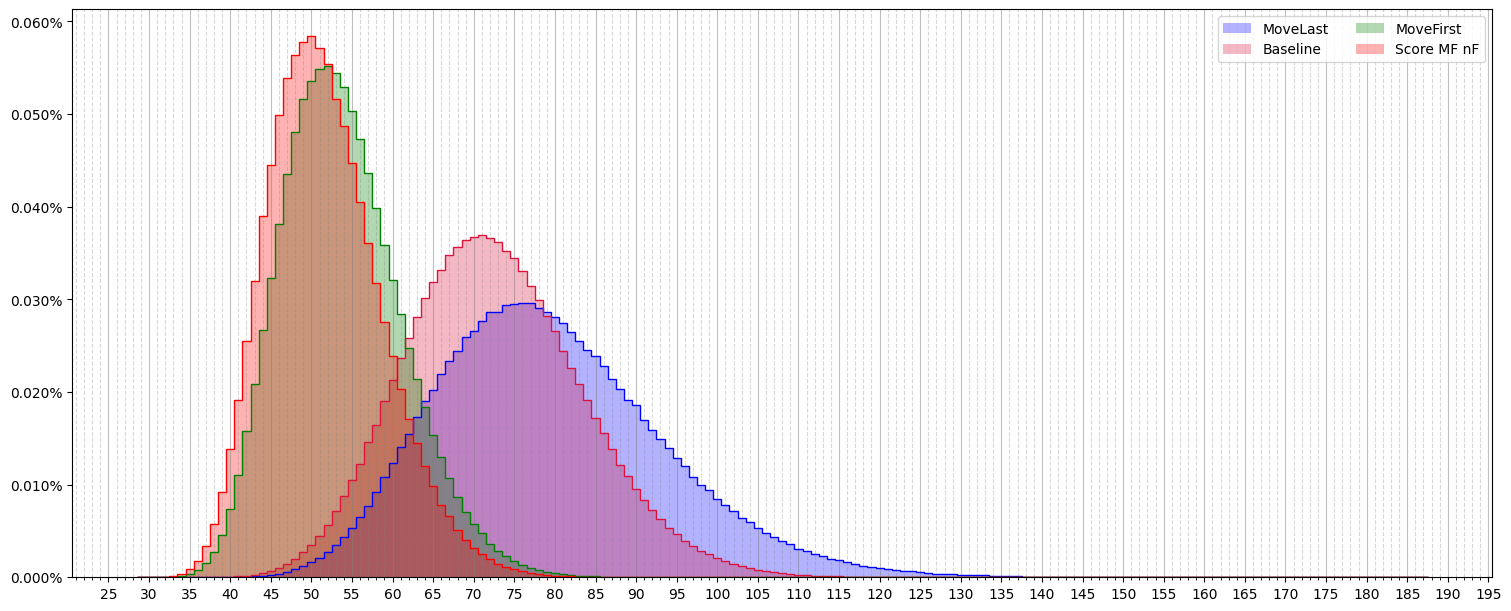

In [10]:
figHist, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[15, 6], layout="constrained")

makeHistogram(sorted_rc, ax["Boxplots Runden"],sorted_labels,colors,ncol=2)


In [11]:
[x for x in enumerate(sorted_labels)]

[(0, 'Score MF nF'), (1, 'MoveFirst'), (2, 'Baseline'), (3, 'MoveLast')]

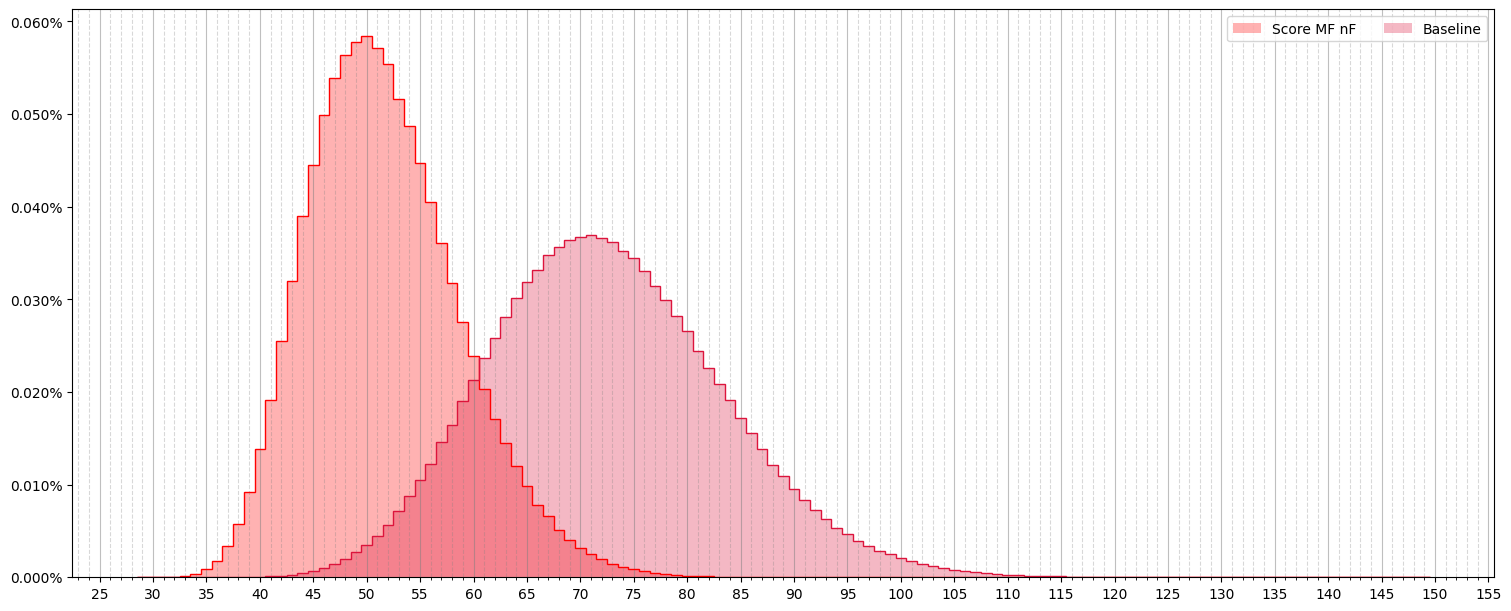

In [12]:
IDs = [2,0]
figHist2, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[15, 6], layout="constrained")

makeHistogram([sorted_rc[i] for i in IDs], ax["Boxplots Runden"], [sorted_labels[i] for i in IDs], [colors[i] for i in IDs])


C:\Users\walli\AppData\Local\Temp/ipykernel_27176/3564363989.py:55: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


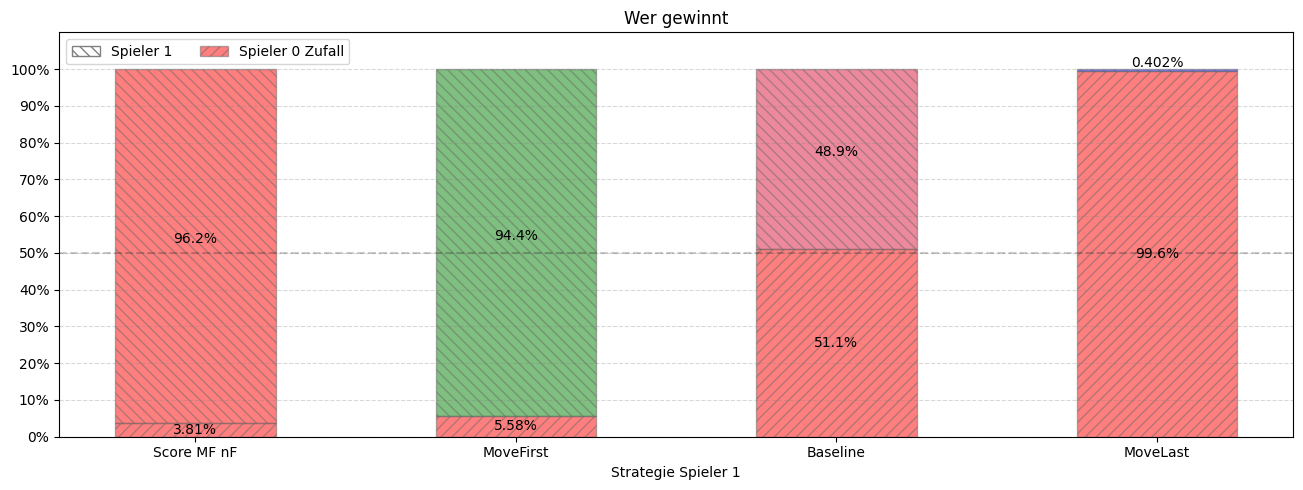

In [13]:
def wer_gewinnt(winners,labels, figsize=[15, 5]):

    player0 = [s.count(["p0"]) / len(s) * 100 for s in winners]
    player1 = [s.count(["p1"]) / len(s) * 100 for s in winners]
    no_one = [s.count([]) / len(s) * 100 for s in winners]
    # both = [s.count(["p0", "p1"]) / len(s) * 100 for s in winners]
    # print(player0)
    # print(player1)

    fig, ax = plt.subplots(figsize=figsize, layout="constrained")
    # hat_graph(ax, xlabels, [player0, player1], ['Player 0', 'Player 1'])

    p0 = ax.bar(
        labels,
        player0,
        label="Spieler 0 Zufall",
        alpha=0.5,
        width=0.5,
        color=colors[0],
        hatch="///",
        edgecolor="dimgray",
    )
    p1 = ax.bar(
        labels,
        player1,
        label="Spieler 1",
        alpha=0.5,
        width=0.5,
        bottom=player0,
        color=colors,
        hatch="\\\\\\",
        edgecolor="dimgray",
    )
    # ab = ax.bar(labels, no_one, label="Abbruch", alpha=.5, width=.5, color=colors,
    #             hatch="...", bottom=[sum(x) for x in zip(player0, player1)])
    # ev = ax.bar(labels, both, label="Unentschieden", alpha=.5, width=.5, color=colors,
    #             hatch="***", bottom=[sum(x) for x in zip(player0, player1, no_one)])

    ax.bar_label(p0, label_type="center", fmt="%3.3g%%", padding=0)
    ax.bar_label(p1, label_type="center", fmt="%3.3g%%", padding=5)
    # ax.bar_label(ab, label_type='center', fmt=" "*10+"%3.2g%%", padding=5)
    # ax.bar_label(ev, label_type='center', fmt="%3.5g%%"+" "*30, padding=5)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel("Strategie Spieler 1")
    ax.set_title("Wer gewinnt")
    # ax.legend( loc='lower center', ncol=2)
    
    legendItem = mp.Patch(facecolor='none', edgecolor='gray', hatch="\\\\\\",
          label='Spieler 1')
    ax.legend(loc="upper left", ncol=2, handles=[legendItem,p0])
    ax.axhline(50, color=(0, 0, 0, 0.2), ls="--")

    fig.tight_layout()
    ax.set_yticks(np.linspace(0, 100, 11))

    ax.set_ylim(0,110)
    ax.yaxis.set_major_formatter(mt.PercentFormatter())
    ax.grid(axis="y", color=("gray"), alpha=0.3, ls="--")
    

    return fig

figWinners= wer_gewinnt(sorted_winners,sorted_labels,[13, 5])

## Speichern der Grafiken

In [14]:
figRounds.savefig("../../tex/game_ur_ba_thesis/img/Grafiken/Strategien/Vergleich/rounds.png", dpi=300,)
figHist.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Strategien/Vergleich/Histogramm.png", dpi=300,)
figWinners.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Strategien/Vergleich/Winner.png", dpi=300,)